In [1]:
import pandas as pd
import numpy as np
import os, json
import pandas as pd
import numpy as np
from season_utils import season
import os.path, time
from comp_utils import return_comp_ids
from import_utils import subset_data
%load_ext autotime
%timeit

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer as knn_impute
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from correlation_matrix1 import *

2021-07-05 20:38:06.853 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [2]:
df=pd.read_csv(r'C:\Users\Home\Anaconda3\envs\venv\Lib\site-packages\Physical_Visualization\Files\All_leagues_Players.csv', usecols=lambda x: 'Unnamed: 0' not in x)

time: 6.43 s


In [3]:
def subset_data(All_leagues_Players):

    All_leagues_Players['date'] = pd.to_datetime(All_leagues_Players['date'], format='%Y-%m-%d')
    All_leagues_Players['Date'] = All_leagues_Players['date'].dt.strftime('%b-%y')
    

    #### Calling the season schedule class ####
    g=season()
    season_schedule=g.season_schedule()
    comp_ids,COMPETITIONS=return_comp_ids()
    comps=pd.DataFrame(COMPETITIONS.items(), columns=['League', 'League_Id'])
    All_leagues_Players=pd.merge(All_leagues_Players,season_schedule,on=['id'],how='inner')
    All_leagues_Players=pd.merge(All_leagues_Players,comps,on='League_Id',how='left')        
   

    All_leagues_Players.drop(['League_Id','player_id','date','player_birthdate', 'match_id', 'team_id','team'], axis=1, inplace=True)
    All_leagues_Players=All_leagues_Players.rename({'player_name': 'Player', 'match_name': 'Match',
                                                    'position': 'Position','team_name': 'Team',
                                                   'group':'Position Group'}, axis=1) 
    
    
    #### Incorporate League Groups #####
    

    All_leagues_Players=All_leagues_Players[['Player','Team','Match','Season', 'League','Position','Position Group','Date','Count Sprint TIP', 'Count Sprint',
       'Count Deceleration', 'Count Deceleration TIP', 'Count Sprint OTIP','Running Distance', 'HSR Distance', 'HSR Distance OTIP',
       'Sprinting Distance TIP', 'Count HSR', 'Distance TIP','Sprinting Distance OTIP', 'Count Acceleration', 'Minutes',
       'Count Deceleration OTIP', 'HSR Distance TIP', 'Distance','Count HSR OTIP', 'Minutes OTIP', 'Running Distance OTIP',
       'Minutes TIP', 'Sprinting Distance', 'Count Acceleration TIP', 'PSV-99','Count Acceleration OTIP', 'Running Distance TIP', 'Count HSR TIP',
       'Distance OTIP']]    
    
 
    return All_leagues_Players

def aggregates(df):
    
    Match_count_player=df1.groupby(['Season','League','Team','Player','Position Group'])['Match'].agg(['count'])
    Match_count_player.reset_index(level = ['Season','League','Team','Player','Position Group'], inplace = True)
    Match_count_player.columns=['Season','League','Team','Player','Position Group','Match_count']
    
    #### Check PSV-99 ####
    PSV = pd.DataFrame(df1.groupby(['Season','League','Team','Player','Position Group'])['PSV-99'].mean())
    PSV.reset_index(level = 0, inplace = True)
    PSV.reset_index(level = 0, inplace = True)
    PSV.reset_index(level = 0, inplace = True)
    PSV.reset_index(level = 0, inplace = True)
    PSV.reset_index(level = 0, inplace = True)
    PSV.sort_values(['Player','Season'], ascending=[True,True])


    ## Getting the Player Column in the index ##    
    mean_df = df.groupby(['Season','League','Team','Player','Position Group']).mean()
    
    def PEC (a, b):
        
        return a*90/ b
    
    mean_df=mean_df.apply(pd.to_numeric)
    mean_df1 = mean_df.apply(lambda row : PEC(row, row['Minutes']), axis = 1)
    
    mean_df1['HIDistance'] = mean_df1['HSR Distance'] + mean_df1['Sprinting Distance']
    mean_df1['HI Count'] = mean_df1['Count HSR'] + mean_df1['Count Sprint']
    
    mean_df1['Mmin'] = mean_df1["Distance"] / 90 #amended
    mean_df1['HI Mmin'] = mean_df1['HIDistance'] / 90 #amended
    mean_df1['HI Distance TIP'] = mean_df1['HSR Distance TIP'] + mean_df1['Sprinting Distance TIP']
    mean_df1['HI Count TIP'] = mean_df1['Count HSR TIP'] + mean_df1['Count Sprint TIP']
    mean_df1['MMin TIP'] = mean_df1['Distance TIP'] / mean_df1['Minutes TIP'] #amended
      
    mean_df1['HI MMin TIP'] = mean_df1['HI Distance TIP']  / mean_df1['Minutes TIP'] #amended
    del mean_df1['PSV-99']
    mean_df1['HI Distance OTIP'] = mean_df1['HSR Distance OTIP'] + mean_df1['Sprinting Distance OTIP']
    mean_df1['HI Count OTIP'] = mean_df1['Count HSR OTIP'] + mean_df1['Count Sprint OTIP']
    mean_df1['MMin OTIP'] = mean_df1['Distance OTIP'] / mean_df1['Minutes OTIP'] #amended
    mean_df1['HI MMin OTIP'] = mean_df1['HI Distance OTIP']  / mean_df1['Minutes OTIP'] #amended
    
    mean_df1.reset_index(level = ['Season','League','Team','Player','Position Group'], inplace = True)
    mean_df1=mean_df1.reset_index(drop=True)
    
    
    mean_df1=pd.merge(mean_df1,Match_count_player,on=['Season','League','Team','Player','Position Group'],how='left')
    mean_df1=pd.merge(mean_df1,PSV,on=['Season','League','Team','Player','Position Group'],how='left')

    return mean_df1

time: 14.6 ms


In [4]:
df1=subset_data(df)
df1=aggregates(df1)

time: 2min 26s


In [41]:
teams=pd.DataFrame(df_ex.Team.unique())

teams.to_csv(r'C:\Users\Home\Documents\teams.csv')

time: 106 ms


In [36]:
df_ex=df1.copy()
df2=df1[['Season', 'League', 'Team', 'Player','','Distance','HIDistance','Match_count']]

time: 68.3 ms


In [37]:
df1["Var_HIDistance"]=df1['HIDistance'].mean()
df1["Var_Distance"]=df1['Distance'].mean()

time: 5.98 ms


In [38]:
df1

Season                   League                    Team  \
0      2016-2017           GER-Bundesliga              1. FC Köln   
1      2016-2017           GER-Bundesliga              1. FC Köln   
2      2016-2017           GER-Bundesliga              1. FC Köln   
3      2016-2017           GER-Bundesliga              1. FC Köln   
4      2016-2017           GER-Bundesliga              1. FC Köln   
...          ...                      ...                     ...   
60244  2021-2022  USA-Major League Soccer  Vancouver Whitecaps FC   
60245  2021-2022  USA-Major League Soccer  Vancouver Whitecaps FC   
60246  2021-2022  USA-Major League Soccer  Vancouver Whitecaps FC   
60247  2021-2022  USA-Major League Soccer  Vancouver Whitecaps FC   
60248  2021-2022  USA-Major League Soccer  Vancouver Whitecaps FC   

                  Player      Distance   HIDistance  Match_count  \
0        Anthony Modeste   9061.290671   697.059777            2   
1        Artjoms Rudnevs  11194.477086  1039.071680            2   
2      Christian Clemens  10148.231151  1064.671042            1   
3          Dominic Maroh   9193.298969   378.865979            1   
4       Dominique Heintz   9338.131019   286.697005            1   
...                  ...           ...          ...          ...   
60244    Russell Teibert  10370.268030   797.043382            1   
60245    Russell Teibert  10133.212850   900.149811            5   
60246        Ryan Raposo  10830.060934   989.167231            7   
60247          Theo Bair  11838.036810  1472.392638            2   
60248   Tosaint Ricketts   9480.763116   646.740859            1   

       Var_HIDistance  Var_Distance  
0          813.763397  10318.725726  
1          813.763397  10318.725726  
2          813.763397  10318.725726  
3          813.763397  10318.725726  
4          813.763397  10318.725726  
...               ...           ...  
60244      813.763397  10318.725726  
60245      813.763397  10318.725726  
60246      813.763397  10318.725726  
60247      813.763397  10318.725726  
60248      813.763397  10318.725726  

[60249 rows x 9 columns]

time: 28.9 ms


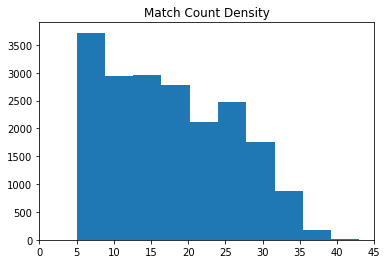

time: 181 ms


In [19]:
plt.hist(df1.Match_count, bins=10)
plt.xticks(np.arange(0,50,5))
plt.title('Match Count Density')
plt.show()

In [20]:
### Remove Cup competitions ###
Cup_Comps = ['CONMEBOL-Copa Libertadores','CONMEBOL-Copa Sudamericana','UEFA-Champions League','UEFA-Europa League']   

df1=df1[~df1['League'].isin(Cup_Comps)].reset_index(drop=True)

### All Players must have played atleast 5 games
df1=df1[df1.Match_count>=5].reset_index(drop=True)


df1=df1.sort_values(['Player','Season'], ascending=[True,True])
Player_list=list(df1.Player.unique())

A=[]
B=[]
C=[]

for i in Player_list:
    
    df2=df1[df1['Player']==i].reset_index(drop=True)
    df2['Team_Transfer'] = df2.groupby((df2['Team'] != df2['Team'].shift(1))).cumcount()
    df2['League_Transfer'] = df2.groupby((df2['League'] != df2['League'].shift(1))).cumcount()
    df2['League_From']=np.where(df2['League_Transfer']>=1,df2['League'].shift(1),df2['League'])
    df2['Team_From']=np.where(df2['Team_Transfer']>=1,df2['Team'].shift(1),df2['Team'])
    
    df2['Team_Transfer']=np.where(df2['Team']==df2['Team_From'],0,df2['Team_Transfer'])
    df2['League_Transfer']=np.where(df2['League']==df2['League_From'],0,df2['League_Transfer'])
    df2.set_index(['Season', 'League', 'Team', 'Player', 'Team_Transfer', 'League_Transfer','League_From', 'Team_From'], inplace=True)
    df2_pct_change=df2.pct_change(fill_method ='ffill').fillna(0)
    df2_pct_change = df2_pct_change.add_suffix('_pct_change')
    df3_pct_change=df2_pct_change.copy()
    df3_pct_change.reset_index(inplace=True)
    df3_pct_change=df3_pct_change[df3_pct_change['Team_Transfer']>0]
    A.append(df2) 
    B.append(df2_pct_change) 
    C.append(df3_pct_change)

df3=pd.concat(A)
df2_pct_change=pd.concat(B)
df3_pct_change=pd.concat(C)

cols_dft=df3_pct_change.columns
df3_pct_change1=pd.DataFrame(df3_pct_change.groupby(['League_From', 'League'])[cols_dft].mean()).reset_index()


KeyError: 'HI Distance TIP_pct_change'

time: 4min 49s


In [23]:
df3_pct_change1_pivot=df3_pct_change1.set_index(['League_From','League'])['HIDistance_pct_change'].unstack(fill_value=0)
df3_pct_change1_pivot.to_csv(r'C:\Users\Home\Documents\df3_pct_change1_pivot.csv')

time: 18 ms


In [25]:
df3_pct_change1_pivot=df3_pct_change1.set_index(['League_From','League'])['Distance_pct_change'].unstack(fill_value=0)
df3_pct_change1_pivot.to_csv(r'C:\Users\Home\Documents\df3_Distance_pct_change.csv')

time: 13 ms


In [24]:
df3_pct_change1.columns

Index(['League_From', 'League', 'Team_Transfer', 'League_Transfer',
       'Distance_pct_change', 'HIDistance_pct_change',
       'Match_count_pct_change'],
      dtype='object')

time: 1.99 ms


In [7]:
df3.reset_index(inplace=True)

time: 21 ms


In [8]:
cols_dft=df3_pct_change.columns
df3_pct_change1=pd.DataFrame(df3_pct_change.groupby(['League_From', 'League'])[cols_dft].mean()).reset_index()
df3_pct_change1_pivot=df3_pct_change1.set_index(['League_From','League'])['HI Distance TIP_pct_change'].unstack(fill_value=0)
df3_pct_change1_pivot.to_csv(r'C:\Users\Home\Documents\df3_pct_change1_pivot.csv')

time: 33.3 ms


In [327]:
check=df3_pct_change[(df3_pct_change['League_From']=='GRE-Super League') &
                     (df3_pct_change['League']=='GER-Bundesliga')]

Season          League           Team            Player  Team_Transfer  \
1  2020-2021  GER-Bundesliga     1. FC Köln  Dimitris Limnios              1   
2  2020-2021  GER-Bundesliga  VfL Wolfsburg       Joao Victor              2   
2  2020-2021  GER-Bundesliga  FC Schalke 04           William              2   

   League_Transfer       League_From      Team_From  \
1                1  GRE-Super League  PAOK Salonika   
2                2  GRE-Super League   OFI Crete FC   
2                2  GRE-Super League     A.O Xanthi   

   Count Sprint TIP_pct_change  Count Sprint_pct_change  ...  \
1                    -0.466738                -0.208322  ...   
2                    10.456495                 2.375965  ...   
2                     0.206835                 0.327518  ...   

   HI Distance TIP_pct_change  HI Count TIP_pct_change  MMin TIP_pct_change  \
1                   -0.205605                -0.251592            -0.079222   
2                    5.495581                 5.374291             0.212794   
2                   -0.008034                 0.196504             0.000003   

   HI MMin TIP_pct_change  HI Distance OTIP_pct_change  \
1               -0.169727                     0.336964   
2                5.667681                     0.516079   
2                0.125771                     0.335039   

   HI Count OTIP_pct_change  MMin OTIP_pct_change  HI MMin OTIP_pct_change  \
1                  0.472495              0.172995                 0.054243   
2                  0.462932             -0.020347                 0.601403   
2                  0.544243             -0.037586                 0.162175   

   Match_count_pct_change  PSV-99_pct_change  
1               -0.657143          -0.068418  
2                0.727273           0.048812  
2               -0.428571          -0.000191  

[3 rows x 49 columns]

time: 28.9 ms


In [9]:
df3_pct_change

Season                   League                                Team  \
1   2020-2021  USA-Major League Soccer  Club Internacional de Fútbol Miami   
1   2020-2021              ITA-Serie A                             Bologna   
1   2020-2021            TUR-Super Lig                         Kayserispor   
1   2020-2021              FRA-Ligue 1                             FC Metz   
1   2020-2021               ESP-LaLiga                    RC Celta de Vigo   
..        ...                      ...                                 ...   
1   2020-2021             ESP-LaLiga 2                           Girona FC   
1   2020-2021   BRA-Brasileiro Série A           Grêmio FB Porto Alegrense   
1   2020-2021             ESP-LaLiga 2                      CF Fuenlabrada   
1   2020-2021             ESP-LaLiga 2                        RCD Espanyol   
1   2019-2020              ITA-Serie B                        US Cremonese   

                             Player  Team_Transfer  League_Transfer  \
1                     A.J DeLaGarza              1                0   
1                      Aaron Hickey              1                1   
1                      Aaron Lennon              1                1   
1                  Aaron Leya Iseka              1                0   
1                      Aaron Martin              1                1   
..                              ...            ...              ...   
1                    Édgar Bárcenas              1                0   
1                           Éverton              1                0   
1   Óscar Francisco García Quintela              1                0   
1                         Óscar Gil              1                0   
1                         Žan Celar              1                0   

                 League_From            Team_From  \
1    USA-Major League Soccer       Houston Dynamo   
1   SCO-Scottish Premiership  Heart of Midlothian   
1         ENG-Premier League              Burnley   
1                FRA-Ligue 1          Toulouse FC   
1             GER-Bundesliga      1. FSV Mainz 05   
..                       ...                  ...   
1               ESP-LaLiga 2          Real Oviedo   
1     BRA-Brasileiro Série A         São Paulo FC   
1               ESP-LaLiga 2       UD Extremadura   
1               ESP-LaLiga 2             Elche CF   
1                ITA-Serie B        AS Cittadella   

    Count Sprint TIP_pct_change  Count Sprint_pct_change  ...  \
1                     -0.621474                -0.126948  ...   
1                      0.258576                 0.131165  ...   
1                      0.705593                -0.117985  ...   
1                     -0.158132                -0.039678  ...   
1                      0.113412                -0.111744  ...   
..                          ...                      ...  ...   
1                     -0.027986                -0.014614  ...   
1                     -0.131349                -0.086264  ...   
1                     -0.129126                -0.030718  ...   
1                      0.287555                 0.191998  ...   
1                     -0.187597                -0.376758  ...   

    HI Distance TIP_pct_change  HI Count TIP_pct_change  MMin TIP_pct_change  \
1                    -0.509773                -0.587550            -0.032290   
1                     0.235815                 0.565729             0.062679   
1                     0.176695                 0.052942            -0.159390   
1                     0.050887                -0.067553            -0.026629   
1                     0.034558                -0.111972             0.002238   
..                         ...                      ...                  ...   
1                    -0.041794                -0.020524            -0.037085   
1                     0.104776                 0.083798             0.076904   
1                    -0.041746                -0.075861             0.003185   

time: 524 ms


In [325]:
#check=df2[(df3['Player']=='Joao Victor')]

df2=df1[df1['Player']=='Joao Victor'].reset_index(drop=True)
df2['Team_Transfer'] = df2.groupby((df2['Team'] != df2['Team'].shift(1))).cumcount()
df2['League_Transfer'] = df2.groupby((df2['League'] != df2['League'].shift(1))).cumcount()
df2['League_From']=np.where(df2['League_Transfer']>=1,df2['League'].shift(1),df2['League'])
df2['Team_From']=np.where(df2['Team_Transfer']>=1,df2['Team'].shift(1),df2['Team'])

df2['Team_Transfer']=np.where(df2['Team']==df2['Team_From'],0,df2['Team_Transfer'])
df2['League_Transfer']=np.where(df2['League']==df2['League_From'],0,df2['League_Transfer'])
df2.set_index(['Season', 'League', 'Team', 'Player', 'Team_Transfer', 'League_Transfer','League_From', 'Team_From'], inplace=True)
df2_pct_change=df2.pct_change(fill_method ='ffill').fillna(0)
df2_pct_change = df2_pct_change.add_suffix('_pct_change')
df3_pct_change=df2_pct_change.copy()
df3_pct_change.reset_index(inplace=True)
df3_pct_change=df3_pct_change[df3_pct_change['Team_Transfer']>0]
#df3_pct_change=df3_pct_change.describe()
df3_pct_change

Season            League           Team       Player  Team_Transfer  \
1  2019-2020  GRE-Super League   OFI Crete FC  Joao Victor              1   
2  2020-2021    GER-Bundesliga  VfL Wolfsburg  Joao Victor              2   

   League_Transfer       League_From      Team_From  \
1                1    GER-Bundesliga  VfL Wolfsburg   
2                2  GRE-Super League   OFI Crete FC   

   Count Sprint TIP_pct_change  Count Sprint_pct_change  ...  \
1                    -0.910434                -0.663688  ...   
2                    10.456495                 2.375965  ...   

   HI Distance TIP_pct_change  HI Count TIP_pct_change  MMin TIP_pct_change  \
1                   -0.806144                -0.828278            -0.072405   
2                    5.495581                 5.374291             0.212794   

   HI MMin TIP_pct_change  HI Distance OTIP_pct_change  \
1               -0.826126                    -0.152450   
2                5.667681                     0.516079   

   HI Count OTIP_pct_change  MMin OTIP_pct_change  HI MMin OTIP_pct_change  \
1                 -0.189614              0.128366                -0.132673   
2                  0.462932             -0.020347                 0.601403   

   Match_count_pct_change  PSV-99_pct_change  
1               -0.607143          -0.057262  
2                0.727273           0.048812  

[2 rows x 49 columns]

time: 56.1 ms


In [290]:
df3_pct_change1_pivot=df3_pct_change1.set_index(['League_From','League'])['HI Distance TIP_pct_change'].unstack(fill_value=0)
df3_pct_change1_pivot.to_csv(r'C:\Users\Home\Documents\df3_pct_change1_pivot.csv')

time: 21.9 ms


In [332]:
import scipy.stats as st

def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        #print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    #print("Best fitting distribution: "+str(best_dist))    

    return best_dist

time: 6.98 ms


In [337]:
A=[]
B=[]

dfx=df1.iloc[:,4:]

cols=dfx.columns

for i in cols:
    Distributions=get_best_distribution(dfx[i])
    A.append(Distributions)
    B.append(i)
    
Distributions=pd.DataFrame({'Column Name':B,'Distribution':A})
Distributions

C:\Users\Home\AppData\Roaming\Python\Python36\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Home\AppData\Roaming\Python\Python36\site-packages\scipy\stats\_continuous_distns.py:1678: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


Column Name Distribution
0          Count Sprint TIP    exponweib
1              Count Sprint    exponweib
2        Count Deceleration   genextreme
3    Count Deceleration TIP    exponweib
4         Count Sprint OTIP    exponweib
5          Running Distance         norm
6              HSR Distance         norm
7         HSR Distance OTIP    exponweib
8    Sprinting Distance TIP    exponweib
9                 Count HSR    exponweib
10             Distance TIP   genextreme
11  Sprinting Distance OTIP    exponweib
12       Count Acceleration         norm
13                  Minutes         norm
14  Count Deceleration OTIP         norm
15         HSR Distance TIP         norm
16                 Distance         norm
17           Count HSR OTIP    exponweib
18             Minutes OTIP         norm
19    Running Distance OTIP    exponweib
20              Minutes TIP   genextreme
21       Sprinting Distance    exponweib
22   Count Acceleration TIP    exponweib
23  Count Acceleration OTIP    exponweib
24     Running Distance TIP         norm
25            Count HSR TIP   genextreme
26            Distance OTIP    exponweib
27               HIDistance         norm
28                 HI Count  weibull_min
29                     Mmin         norm
30                  HI Mmin    exponweib
31          HI Distance TIP   genextreme
32             HI Count TIP   genextreme
33                 MMin TIP    exponweib
34              HI MMin TIP         norm
35         HI Distance OTIP    exponweib
36            HI Count OTIP    exponweib
37                MMin OTIP   genextreme
38             HI MMin OTIP    exponweib
39              Match_count   genextreme
40                   PSV-99         norm

time: 2min 35s


In [119]:
max(df3.League_Transfer)

7

time: 11.2 ms


In [82]:
check=df3[df3.League_Transfer==7]
check.to_csv(r'C:\Users\Home\Documents\B3.csv')

time: 25.9 ms


In [191]:
df3.to_csv(r'C:\Users\Home\Documents\df3.csv')

time: 1.25 s


In [80]:
check.columns

Index(['Season', 'League', 'Team', 'Player', 'Count Sprint TIP',
       'Count Sprint', 'Count Deceleration', 'Count Deceleration TIP',
       'Count Sprint OTIP', 'Running Distance', 'HSR Distance',
       'HSR Distance OTIP', 'Sprinting Distance TIP', 'Count HSR',
       'Distance TIP', 'Sprinting Distance OTIP', 'Count Acceleration',
       'Minutes', 'Count Deceleration OTIP', 'HSR Distance TIP', 'Distance',
       'Count HSR OTIP', 'Minutes OTIP', 'Running Distance OTIP',
       'Minutes TIP', 'Sprinting Distance', 'Count Acceleration TIP', 'PSV-99',
       'Count Acceleration OTIP', 'Running Distance TIP', 'Count HSR TIP',
       'Distance OTIP', 'HIDistance', 'HI Count', 'Mmin', 'HI Mmin',
       'HI Distance TIP', 'HI Count TIP', 'MMin TIP', 'HI MMin TIP',
       'HI Distance OTIP', 'HI Count OTIP', 'MMin OTIP', 'HI MMin OTIP',
       'Team_Transfer', 'League_Transfer'],
      dtype='object')

time: 3.55 ms
